# 2º Desafio - alura - imersao dados

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers

### Importando pandas para manipular dfs

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


### Armazenando a coluna valor com a retirada do sifrão e outros nomes (categoricas)

In [2]:
'''
Transformando e armazenando a coluna valores
Transformando dados de valores a tipo float
limpeza do df
excluindo algumas colunas
'''

dados[['primeira', 'Novo_valor', 'ultima']] = dados['Valor'].str.split(expand=True)
dados = dados.drop(['Valor','primeira', 'ultima'], axis=1)
dados['Novo_valor'] = dados['Novo_valor'].str.replace('.','').astype(float)

/tmp/ipykernel_14650/618260978.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Novo_valor'] = dados['Novo_valor'].str.replace('.','').astype(float)


In [3]:
dados.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Novo_valor
2004,Rua Manguatá,Cidade Monções,São Paulo,196,4,5,4,2000000.0
734,Rua Guilherme Moura,Vila Madalena,São Paulo,339,5,4,4,3100000.0
9149,Travessa Dança do Manjericão,Vila Água Funda,São Paulo,90,2,2,2,370000.0
113,"Rua Araripe, 145",Vila Califórnia,São Paulo,300,6,3,2,430000.0
3300,Rua General Fonseca Teles,Jardim Paulista,São Paulo,1150,5,8,8,27000000.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6574 non-null   object 
 1   Bairro      9996 non-null   object 
 2   Cidade      10008 non-null  object 
 3   Metragem    10008 non-null  int64  
 4   Quartos     10008 non-null  int64  
 5   Banheiros   10008 non-null  int64  
 6   Vagas       10008 non-null  int64  
 7   Novo_valor  10008 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


In [5]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas,Novo_valor
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+06
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+06
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [6]:
dados_ = pd.DataFrame()
dados_ = dados
dados_['Novo_valor_menor_que_1m'] = dados.loc[(dados['Novo_valor'] < 1000000), 'Novo_valor']
dados_['Novo_valor_entre_1m_10m'] = dados.loc[(dados['Novo_valor'] > 1000000) & (dados['Novo_valor'] < 10000000), 'Novo_valor']
dados_['Novo_valor_entre_10m_60m'] = dados.loc[(dados['Novo_valor'] > 10000000) & (dados['Novo_valor'] < 60000000), 'Novo_valor']

dados_.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Novo_valor,Novo_valor_menor_que_1m,Novo_valor_entre_1m_10m,Novo_valor_entre_10m_60m
2954,Rua Dona Balduína,Sumaré,São Paulo,410,3,6,3,3100000.0,NaN,3100000.0,NaN
8243,"Rua Orozimbo Maia, 171",Alto da Mooca,São Paulo,225,6,7,6,2000000.0,NaN,2000000.0,NaN
2858,Praça Horácio Sabino,Pinheiros,São Paulo,260,4,3,3,2700000.0,NaN,2700000.0,NaN
6032,NaN,Jardim Europa,São Paulo,198,4,3,5,6300000.0,NaN,6300000.0,NaN
677,Rua Doutor Luís Augusto de Queirós Aranha,Vila Madalena,São Paulo,136,3,2,2,1500000.0,NaN,1500000.0,NaN


In [7]:
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Novo_valor,Novo_valor_menor_que_1m,Novo_valor_entre_1m_10m,Novo_valor_entre_10m_60m
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,NaN,7000000.0,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,NaN,3700000.0,NaN
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,380000.0,NaN,NaN
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,685000.0,NaN,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,540000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,665000.0,NaN,NaN
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.0,NaN,2300000.0,NaN
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,NaN,1050000.0,NaN
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,2200.0,2200.0,NaN,NaN


### Importando seaborn and matplot.pyplot para plotar uns gráficos

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Gráfico geral dos imóveis

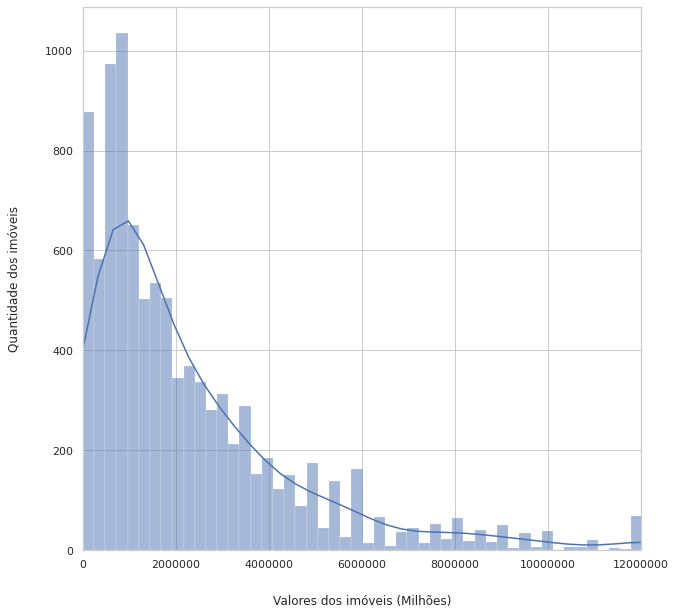

In [9]:
sns.set()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,10))
sns.histplot(data = dados_, x='Novo_valor', kde=True)
plt.xlabel('Valores dos imóveis (Milhões)', labelpad=25, )
plt.ylabel('Quantidade dos imóveis', labelpad=25)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,12000000)
plt.show()

### Gráfico de imóveis com valores entre 0 e 1 milhão

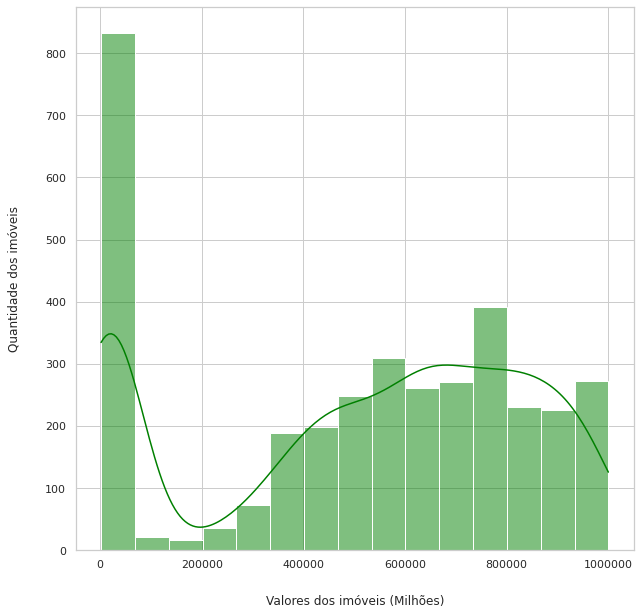

In [10]:
sns.set()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,10))
sns.histplot(data = dados_, x='Novo_valor_menor_que_1m', kde=True, color='Green')
plt.xlabel('Valores dos imóveis (Milhões)', labelpad=25, )
plt.ylabel('Quantidade dos imóveis', labelpad=25)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Gráfico de imóveis com valores entre 1 milhão e 10 milhões

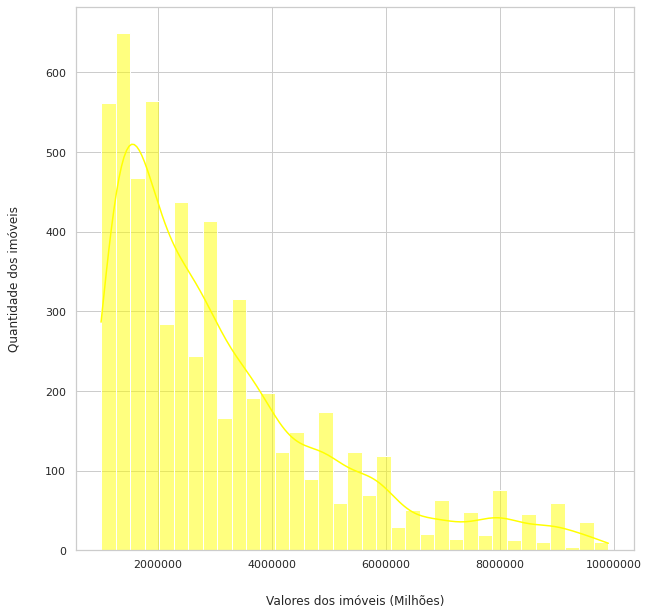

In [11]:
sns.set()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,10))
sns.histplot(data = dados_, x='Novo_valor_entre_1m_10m', kde=True, color='Yellow')
plt.xlabel('Valores dos imóveis (Milhões)', labelpad=25, )
plt.ylabel('Quantidade dos imóveis', labelpad=25)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Gráfico de imóveis com valores entre 10 milhões e 60 milhões

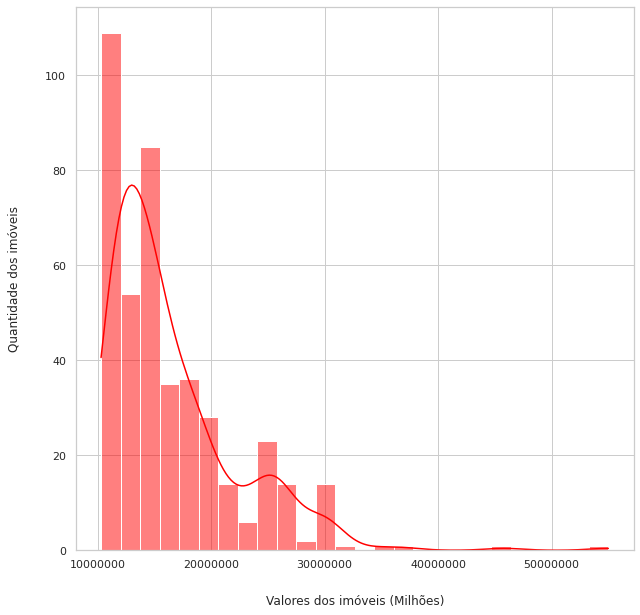

In [12]:
sns.set()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,10))
sns.histplot(data = dados_, x='Novo_valor_entre_10m_60m', kde=True, color='Red')
plt.xlabel('Valores dos imóveis (Milhões)', labelpad=25, )
plt.ylabel('Quantidade dos imóveis', labelpad=25)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Preço do metro quadrado por bairro, plotar

In [13]:
dados = dados.drop(['Novo_valor_menor_que_1m',
                    'Novo_valor_entre_1m_10m',
                    'Novo_valor_entre_10m_60m'], axis=1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Novo_valor
4443,NaN,Vila São Silvestre,São Paulo,130,3,3,3,1100000.0
7328,NaN,Jardim Peri,São Paulo,330,3,2,3,1250000.0
8227,NaN,Vila Brasílio Machado,São Paulo,115,3,3,2,650000.0
8252,Rua Sassaki,Vila Marari,São Paulo,270,3,6,3,980000.0
6539,Rua Francisco de Vitória,Jardim Vila Mariana,São Paulo,220,3,3,4,1400000.0
289,"Rua Baiás, 22",Boaçava,São Paulo,400,3,4,4,15000.0
5721,NaN,Santo Amaro,São Paulo,714,5,7,4,3400000.0
4136,Rua Pedro Zonta Neto,Cidade Monções,São Paulo,150,3,4,2,1940000.0
911,Rua Coronel Mendonça,Chácara Santo Antônio (Zona Leste),São Paulo,140,2,3,6,700000.0
5891,Rua Fábia,Vila Romana,São Paulo,148,3,3,1,800000.0


In [17]:
dados.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Novo_valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.0
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.0
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.0
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,199900.0
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,585000.0


In [14]:
dados[['Bairro','Metragem']]

,Bairro,Metragem
0,Planalto Paulista,1000
1,Jardim dos Estados,496
2,Jardim Reimberg,125
3,Jardim Morumbi,310
4,Mooca,100
...,...,...
10003,Vila Sofia,95
10004,Bosque da Saúde,605
10005,Vila da Saúde,205
10006,Vila Oratório,185


In [16]:
dados[['Bairro','Novo_valor']]

,Bairro,Novo_valor
0,Planalto Paulista,7000000.0
1,Jardim dos Estados,3700000.0
2,Jardim Reimberg,380000.0
3,Jardim Morumbi,685000.0
4,Mooca,540000.0
...,...,...
10003,Vila Sofia,665000.0
10004,Bosque da Saúde,2300000.0
10005,Vila da Saúde,1050000.0
10006,Vila Oratório,2200.0
